In [19]:
from clit_recommender.util import flat_map, iterate_dirs
from clit_recommender import MD_ONLY


files = list(
    flat_map(
        lambda x: iterate_dirs(x, False), flat_map(iterate_dirs, iterate_dirs(MD_ONLY))
    )
)
x: str
names = set(map(lambda x: "/".join(x.split("/")[-2:]), files))


print(len(files))
print(len(names))
print(files[0])

19464
19464
/Users/niladi/workspace/seminar-kdd/data/2024-05-14/MDOnly/KORE_50_DBpedia.ttl/TextRazor/a7542e21d3d55116ca5c88cc0660f6347e54a74a244856ad7951ee5f5b15e984.json


In [5]:
from clit_recommender.config import Config
from clit_recommender.data.dataset import ClitResultDataset

recommender = ClitResultDataset(Config(batch_size=100))
texts = []
for i in recommender:
    for j in i:
        texts.append(j.context_text)

        # Calculate the text lengths

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


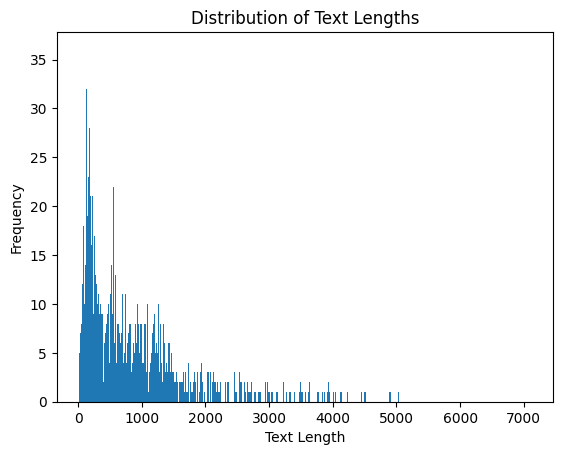

In [4]:
import matplotlib.pyplot as plt

text_lengths = [len(text) for text in texts]

# Create a histogram
plt.hist(text_lengths, bins=1000)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()

/Users/niladi/opt/anaconda3/envs/kdd-seminar/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (559 > 512). Running this sequence through the model will result in indexing errors


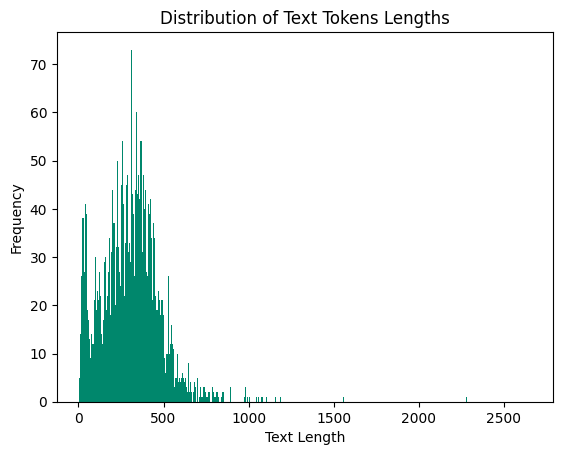

overflown: 554 / 6563


In [7]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from clit_recommender.config import Config


config = Config()
tokenizer = AutoTokenizer.from_pretrained(config.lm_model_name)

token_lengths = [len(tokenizer.tokenize(text)) for text in texts]

# Create a histogram
plt.hist(token_lengths, bins=1000)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Tokens Lengths")
plt.show()

token_overflows = list(
    filter(lambda tl: tl > tokenizer.model_max_length, token_lengths)
)
print("overflown:", len(token_overflows), "/", len(token_lengths))

In [4]:
test

['Foreign',
 'Ġplanes',
 'Ġto',
 'Ġland',
 'Ġin',
 'ĠChina',
 "Ġ'",
 's',
 'Ġpopular',
 'ĠGu',
 'il',
 'in',
 'Ġ.',
 'Ġ',
 'ĠBE',
 'IJ',
 'ING',
 'Ġ1996',
 '-',
 '12',
 '-',
 '06',
 'Ġ',
 'ĠChina',
 "Ġ'",
 's',
 'Ġtourist',
 'Ġspot',
 'Ġof',
 'ĠGu',
 'il',
 'in',
 'Ġin',
 'Ġthe',
 'Ġsouthern',
 'Ġregion',
 'Ġof',
 'ĠGuang',
 'xi',
 'Ġwill',
 'Ġopen',
 'Ġits',
 'Ġairport',
 'Ġto',
 'Ġforeign',
 'Ġaircraft',
 'Ġ,',
 'Ġthe',
 'ĠXin',
 'hua',
 'Ġnews',
 'Ġagency',
 'Ġsaid',
 'Ġon',
 'ĠFriday',
 'Ġ.',
 'Ġ',
 'ĠAn',
 'Ġassessment',
 'Ġgroup',
 'Ġmade',
 'Ġup',
 'Ġof',
 'Ġthe',
 'ĠState',
 'ĠCouncil',
 "Ġ'",
 's',
 'ĠPort',
 'ĠOffice',
 'Ġ,',
 'Ġthe',
 'ĠCivil',
 'ĠAviation',
 'ĠAdministration',
 'Ġof',
 'ĠChina',
 'Ġ,',
 'Ġthe',
 'ĠGeneral',
 'ĠAdministration',
 'Ġof',
 'ĠCustoms',
 'Ġand',
 'Ġother',
 'Ġauthorities',
 'Ġhad',
 'Ġgranted',
 'Ġthe',
 'Ġairport',
 'Ġpermission',
 'Ġto',
 'Ġhandle',
 'Ġforeign',
 'Ġaircraft',
 'Ġ,',
 'ĠXin',
 'hua',
 'Ġsaid',
 'Ġ.',
 'Ġ',
 'Ġ"',
 'ĠThe',
 'Ġmov

## Best Graphs Evaluation

In [1]:
import sys

print(sys.path)

['/local/users/uduui/.localpython/lib/python39.zip', '/local/users/uduui/.localpython/lib/python3.9', '/local/users/uduui/.localpython/lib/python3.9/lib-dynload', '', '/local/users/uduui/.localpython/venv/clit_recommender/lib/python3.9/site-packages', '/local/users/uduui/clit_recommender/src']


In [1]:
from data.best_graphs import generate_tensors

tensors = generate_tensors(30)

KeyboardInterrupt: 

In [5]:
from config import BEST_GRAPHS_LMDB_FILE
from config import BEST_GRAPHS_JSON_FILE
from data.lmdb_wrapper import LmdbImmutableDict
from clit_recommender import BEST_GRAPHS_PATH
from clit_recommender.config import Config
from os.path import join

lmdb = LmdbImmutableDict(join(BEST_GRAPHS_PATH, BEST_GRAPHS_LMDB_FILE))
lmdb.get("https://aifb.kit.edu/conll/18#char=0,882")

[[[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0]],
 [[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0]]]

{3.0: 740, 1.0: 1872, 2.0: 2998, 4.0: 473, 5.0: 64, 6.0: 75}


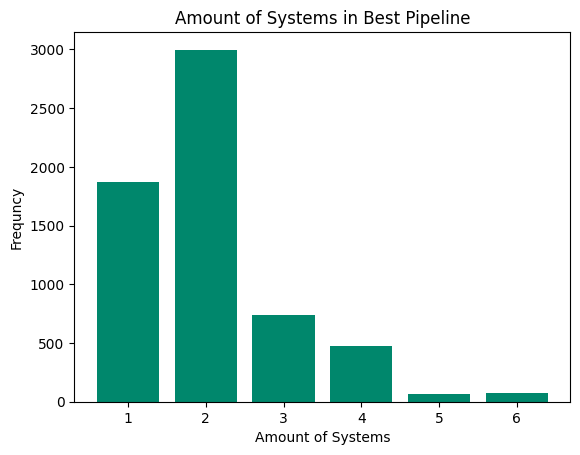

In [6]:
from config import BEST_GRAPHS_LMDB_FILE
from config import BEST_GRAPHS_JSON_FILE
from data.lmdb_wrapper import LmdbImmutableDict
from clit_recommender.config import Config
from data.dataset import ClitRecommenderDataset
from os.path import join
from tqdm.auto import tqdm
import json
from collections import Counter


# Load the best graphs JSON
with open(join(BEST_GRAPHS_JSON_FILE, BEST_GRAPHS_JSON_FILE), "r") as f:
    best_graphs = json.load(f)

graphs = []

for key, value in best_graphs.items():
    if value is None:
        print("NONE ")
        continue
    for v in value:
        graphs.append(tuple(map(tuple, v)))

element_counts = Counter(graphs)
amount = {}
for key, value in element_counts.items():
    _a = sum(map(sum, key))
    # print(value, _a, key)

    _val = value
    if _a == 1.0:
        _val /= 3  # on single majority, intersection and uninon are the same
    elif _a == 2.0 and sum([k[1] for k in key]) == 2.0:
        _val /= 2  # on 2 majority and intersection are the same
    if _a not in amount:
        amount[_a] = value
    else:
        amount[_a] += value

len(element_counts)

print(amount)

import matplotlib.pyplot as plt

# Plotting the amount dictionary as a bar chart
plt.bar(amount.keys(), amount.values())
plt.xlabel("Amount of Systems")
plt.ylabel("Frequncy")
plt.title("Amount of Systems in Best Pipeline")
plt.show()

{1: {'Single': 3621}, 2: {'Intersection or Majority Voting': 2945, 'Union': 3416}, 3: {'Union': 2261}, 4: {'Union': 873}, 5: {'Union': 84}, 6: {'Union': 108}, 7: {'Union': 1}}


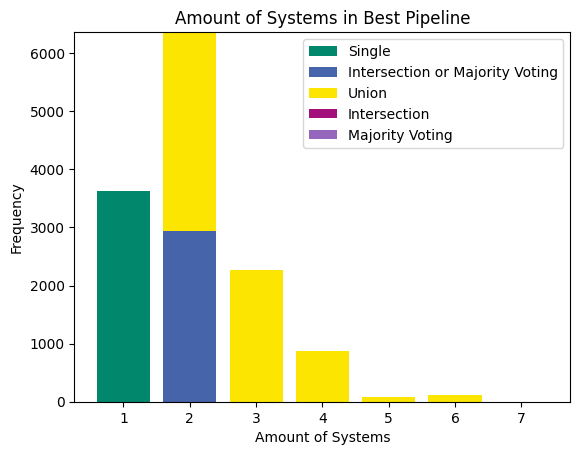

In [3]:
from config import BEST_GRAPHS_LMDB_FILE
from config import BEST_GRAPHS_JSON_FILE
from data.lmdb_wrapper import LmdbImmutableDict
from clit_recommender.config import Config

from os.path import join
from tqdm.auto import tqdm
import json
from collections import Counter


# Load the best graphs JSON
with open(join(BEST_GRAPHS_PATH, BEST_GRAPHS_JSON_FILE), "r") as f:
    best_graphs = json.load(f)

graphs = []

for key, value in best_graphs.items():
    if value is None:
        print("NONE ")
        continue
    for v in value:
        graphs.append(tuple(map(tuple, v)))

element_counts = Counter(graphs)
amount = {i + 1: {} for i in range(7)}


for key, value in element_counts.items():
    _a = sum(map(sum, key))
    # print(value, _a, key)

    _val = value

    if _a == 1.0:
        _val /= 3  # on single majority, intersection and uninon are the same
        _key = "Single"
    elif _a == 2.0 and sum([k[1] for k in key]) == 2.0:
        _val /= 2  # on 2 majority and intersection are the same
        _key = "Intersection or Majority Voting"
    elif sum([k[0] for k in key]) >= 0:
        _key = "Union"
    elif sum([k[1] for k in key]) >= 0:
        _key = "Intersection"
    elif sum([k[2] for k in key]) >= 0:
        _key = "Majority Voting"

    if _key not in amount[_a]:
        amount[_a][_key] = value
    else:
        amount[_a][_key] += value

len(element_counts)

print(amount)

import matplotlib.pyplot as plt

# Extract the keys and values from the 'amount' dictionary
keys = list(amount.keys())
values = list(amount.values())

# Create a list of labels for the x-axis
labels = [
    "Single",
    "Intersection or Majority Voting",
    "Union",
    "Intersection",
    "Majority Voting",
]

# Create a list of colors for the stacked bars
colors = [
    "#00876C",
    "#4664aa",
    "#fce500",
    "#a3107c",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

# Create a list of bottom values for the stacked bars
bottom = [0] * len(keys)

# Plot the stacked bars
for i in range(len(labels)):
    plt.bar(
        keys,
        [v.get(labels[i], 0) for v in values],
        bottom=bottom,
        label=labels[i],
        color=colors[i],
    )
    bottom = [
        bottom[j] + [v.get(labels[i], 0) for v in values][j] for j in range(len(keys))
    ]

# Add labels and title to the plot
plt.xlabel("Amount of Systems")
plt.ylabel("Frequency")
plt.title("Amount of Systems in Best Pipeline")

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

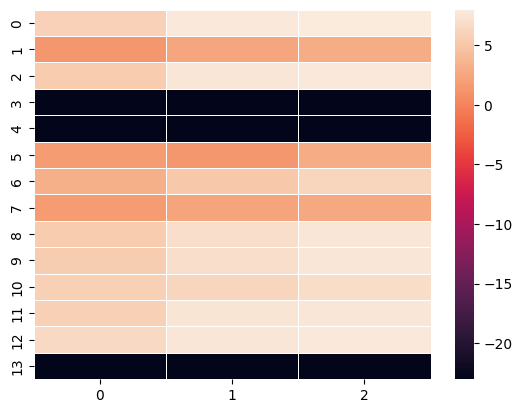

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


matrizes = map(np.matrix, graphs)

s_matrizes = sum(matrizes, np.zeros((14, 3)))
ln_s_matrizes = np.log(np.where(s_matrizes == 0, 1e-10, s_matrizes))


ax = sns.heatmap(ln_s_matrizes, linewidth=0.5)
plt.show()

In [5]:
import os
from clit_recommender.util import iterate_dirs, flat_map

from collections import Counter

path = "/Users/niladi/workspace/seminar-kdd/data/2024-05-14/MDOnly"
systems = []

for i in flat_map(iterate_dirs, iterate_dirs(path)):
    systems.append(i.split("/")[-1])
Counter(systems)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/niladi/workspace/seminar-kdd/data/2024-05-14/MDOnly'